<a href="https://colab.research.google.com/github/tijanai/TestGit/blob/master/Temporal_weight_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#connection to Kaggle API
!pip install -q kaggle
!mkdir ~/.kaggle
from google.colab import files
files.upload()

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"tijanailievska12","key":"c4ab92c2c5786eb050805900e4b6cc47"}'}

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"tijanailievska12","key":"c4ab92c2c5786eb050805900e4b6cc47"}'}

In [6]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#download the arxiv dataset
!kaggle datasets download -d Cornell-University/arxiv
!chmod 600 ~/arxiv-metadata-oai-snapshot.json
!unzip arxiv.zip

arxiv.zip: Skipping, found more recently modified local copy (use --force to force download)
chmod: cannot access '/root/arxiv-metadata-oai-snapshot.json': No such file or directory
Archive:  arxiv.zip
replace arxiv-metadata-oai-snapshot.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: arxiv.zip: Skipping, found more recently modified local copy (use --force to force download)
chmod: cannot access '/root/arxiv-metadata-oai-snapshot.json': No such file or directory
Archive:  arxiv.zip
replace arxiv-metadata-oai-snapshot.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [24]:
import pandas as pd
import numpy as np
import json

In [9]:
#Using `yield` to load the JSON file in a loop to prevent Python memory issues if JSON is loaded directly
data_file = '/content/arxiv-metadata-oai-snapshot.json'

def get_metadata():
    with open(data_file, 'r') as f:
        for line in f:
            yield line

metadata = get_metadata()


In [10]:
#extracting the year from the 'journal-ref' column and creating separate list for each column
metadata = get_metadata()
ids = []
titles = []
abstracts = []
categories = []
years = []
for paper in metadata:
    metaDict = json.loads(paper)
    try:
        try:
            year = int(metaDict['journal-ref'][-4:])    ### Example Format: "Phys.Rev.D76:013009,2007"
        except:
            year = int(metaDict['journal-ref'][-5:-1])    ### Example Format: "Phys.Rev.D76:013009,(2007)"
        
        ids.append(metaDict['id'])
        titles.append(metaDict['title'])
        abstracts.append(metaDict['abstract'])
        categories.append(metaDict['categories'])
        years.append(year)
    except:
        pass

In [11]:
#creating a data frame from the lists with the corresponding columns and the year included
df = pd.DataFrame({'id' : ids,'Title' : titles,'Abstract' : abstracts, 'Year' : years, 'categories' : categories})
df.head()

,id,Title,Abstract,Year,categories
0,0704.0001,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,2007,hep-ph
1,0704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,-689,math.CA math.FA
2,0704.0007,Polymer Quantum Mechanics and its Continuum Limit,A rather non-standard quantum representation...,2007,gr-qc
3,0704.0008,Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,2008,cond-mat.mtrl-sci
4,0704.0009,"The Spitzer c2d Survey of Large, Nearby, Inste...",We discuss the results from the combined IRA...,2007,astro-ph


In [12]:
min_year = df['Year'].min()
print(min_year)
max_year = df['Year'].max()
print(max_year)

-999
9999


In [13]:
#selecting only papers from year 1990 to year 2022 
df1 = df[(df['Year'] > 1990) & (df['Year'] < 2022)]

In [14]:
#renaming categories with more representable names
maskM = df1['categories'].str.contains('math')
df1.loc[maskM, 'categories'] = 'Maths'
phys = ['ph', 'mat', 'qc', 'hep', 'nlin', 'nucl', 'physics', 'quant']
pattern = '|'.join(phys)
maskP = df1['categories'].str.contains(pattern)
df1.loc[maskP, 'categories'] = 'Physics'
maskB = df1['categories'].str.contains('bio')
df1.loc[maskB, 'categories'] = 'Biology'
maskF = df1['categories'].str.contains('fin')
df1.loc[maskF, 'categories'] = 'Finance'
maskS = df1['categories'].str.contains('stat')
df1.loc[maskS, 'categories'] = 'Statistics'
maskCS = df1['categories'].str.contains('cs')
df1.loc[maskCS, 'categories'] = 'Computer Science'
maskE = df1['categories'].str.contains('econ')
df1.loc[maskE, 'categories'] = 'Economics'
maskES = df1['categories'].str.contains('eess')
df1.loc[maskES, 'categories'] = 'Electrical Engineering and Systems Science'

In [15]:
df1

,id,Title,Abstract,Year,categories
0,0704.0001,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,2007,Computer Science
2,0704.0007,Polymer Quantum Mechanics and its Continuum Limit,A rather non-standard quantum representation...,2007,Computer Science
3,0704.0008,Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,2008,Computer Science
4,0704.0009,"The Spitzer c2d Survey of Large, Nearby, Inste...",We discuss the results from the combined IRA...,2007,Computer Science
5,0704.0015,Fermionic superstring loop amplitudes in the p...,The pure spinor formulation of the ten-dimen...,2007,Computer Science
...,...,...,...,...,...
720581,supr-con/9510001,The string model of the Cooper pair in the ani...,The analogy between the Cooper pair in high ...,1996,Computer Science
720586,supr-con/9607007,Towards a Microscopic Theory for Metallic Heav...,The bias-dependent resistance R(V) of NS-jun...,1997,Computer Science
720588,supr-con/9608003,Extended bound states and resonances of two fe...,The high-$T_c$ cuprates are possible candida...,1997,Computer Science
720589,supr-con/9608004,Ginzburg-Landau-Gor'kov Theory of Magnetic osc...,We investigate de Haas-van Alphen (dHvA) osc...,1997,Computer Science


In [16]:
group_sizes = df1.groupby('categories').size()
group_sizes

categories
Biology                                         2375
Computer Science                              415096
Economics                                         32
Electrical Engineering and Systems Science       495
Finance                                          697
Maths                                          38526
dtype: int64

In [17]:
#new dataset with equal number of papers from each category
n_samples = 1000
grouped = df1.groupby('categories', group_keys=False).apply(lambda x: x.sample(n=min(n_samples, len(x)), random_state=42))
df2 = grouped.sample(frac=1, random_state=42).reset_index(drop=True)

In [18]:
#randomly sampling papers
df3 = df2.sample(n=3000)


In [19]:
group_sizes = df3.groupby('categories').size()
group_sizes

categories
Biology                                       713
Computer Science                              702
Economics                                      23
Electrical Engineering and Systems Science    362
Finance                                       489
Maths                                         711
dtype: int64

In [20]:
min_year = df3['Year'].min()
print(min_year)
max_year = df3['Year'].max()
print(max_year)

1992
2021


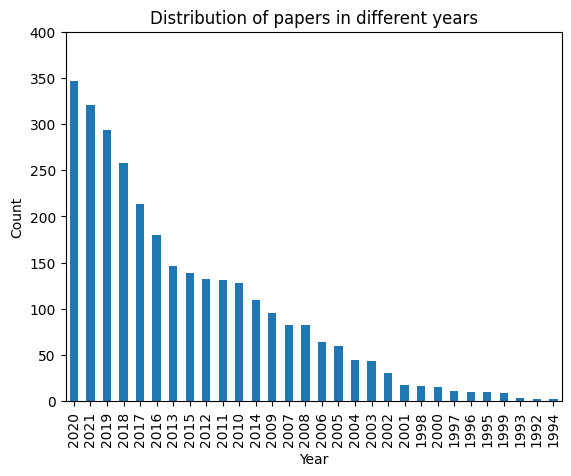

In [21]:
#distribution of number of papers in different years
import matplotlib.pyplot as plt
year_counts = df3['Year'].value_counts()

year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of papers in different years')
plt.ylim(0, 400)
plt.show()

In [22]:
%%capture
!pip install datasets==1.2.1
!pip install transformers
!pip install rouge_score

In [23]:
#preprocessing function that removes removes URLs and email addresses, removes non-alphanumeric characters and converts the text to lowercase, tokenizes the text into words, removes stop words, and re-joins the words into a single string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Preprocess the text data
def preprocess(text):
    # Remove any URLs or email addresses
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)

    # Remove any non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove any stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    # Rejoin the words into a single string
    text = ' '.join(words)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
#using SPECTER to compute the embeddings
import torch
from transformers import AutoTokenizer, AutoModel


# Load the SPECTER model and tokenizer
model_name = "allenai/specter"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Compute the embeddings in batches
batch_size = 12
num_batches = (len(df3) + batch_size - 1) // batch_size

embeddings = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(df3))
    batch = df3.iloc[start_idx:end_idx]
    inputs = list(batch.apply(lambda row: f"{row['Title']} {preprocess(row['Abstract'])}", axis=1))

    # Tokenize the inputs and pad the sequences
    encoded_inputs = tokenizer(inputs, padding=True, truncation=True, max_length=512, return_tensors='pt')
    padded_inputs = {k: v.to(model.device) for k, v in encoded_inputs.items()}

    # Compute the embeddings for the batch
    with torch.no_grad():
        outputs = model(**padded_inputs)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()

    embeddings.append(batch_embeddings)

# Concatenate the embeddings for all batches
embeddings = np.concatenate(embeddings, axis=0)

**No Weights In The Classification Process**

In [30]:
#splitting the data
from sklearn.model_selection import train_test_split

X_trainNW, X_testNW, y_trainNW, y_testNW = train_test_split(embeddings, df3['categories'], test_size=0.2, random_state=42)

In [32]:
from sklearn.svm import LinearSVC

clfNW = LinearSVC()
clfNW.fit(X_trainNW, y_trainNW)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [33]:
y_predNW = clfNW.predict(X_testNW)

from sklearn.metrics import classification_report

print(classification_report(y_testNW, y_predNW))

                                            precision    recall  f1-score   support

                                   Biology       0.91      0.94      0.92       144
                          Computer Science       0.84      0.76      0.80       147
                                 Economics       1.00      0.20      0.33         5
Electrical Engineering and Systems Science       0.86      0.81      0.83        73
                                   Finance       0.91      0.91      0.91        96
                                     Maths       0.74      0.84      0.78       135

                                  accuracy                           0.84       600
                                 macro avg       0.88      0.74      0.76       600
                              weighted avg       0.85      0.84      0.84       600



**Harmonic Weights**

In [34]:
#weights with harmonic
weightsH = np.zeros(len(df3))

max_year = df3['Year'].max()
min_year = df3['Year'].min()
center_year = (min_year + max_year) / 2
for i, year in enumerate(df3['Year']):
    weightsH[i] = 1 / (1 + abs(year - center_year))



In [35]:
#splitting the data
from sklearn.model_selection import train_test_split

X_trainH, X_testH, y_trainH, y_testH, weights_trainH, weights_testH = train_test_split(embeddings, df3['categories'], weightsH, test_size=0.2, random_state=42)

In [36]:
#the weights array had to be reshaped to be able to multiply it with the training data
weights_trainH = weights_trainH.reshape((-1, 1))
X_train_weightedH = X_trainH*weights_trainH

In [37]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train_weightedH, y_trainH)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [38]:
X_test_weightedH = X_testH*weights_testH.reshape((-1, 1))
y_predH = clf.predict(X_test_weightedH)

from sklearn.metrics import classification_report

print(classification_report(y_testH, y_predH))

                                            precision    recall  f1-score   support

                                   Biology       0.93      0.94      0.93       144
                          Computer Science       0.90      0.83      0.87       147
                                 Economics       1.00      0.20      0.33         5
Electrical Engineering and Systems Science       0.88      0.92      0.90        73
                                   Finance       0.93      0.94      0.93        96
                                     Maths       0.81      0.87      0.84       135

                                  accuracy                           0.89       600
                                 macro avg       0.91      0.78      0.80       600
                              weighted avg       0.89      0.89      0.89       600



**Linear Weights** 


In [39]:
#weights with linear function
weightsL = np.zeros(len(df3))

max_year = df3['Year'].max()
min_year = df3['Year'].min()
for i, year in enumerate(df3['Year']):
    weightsL[i] = (max_year - year + 1) / (max_year - min_year + 1)

In [40]:
#splitting the data
from sklearn.model_selection import train_test_split

X_trainL, X_testL, y_trainL, y_testL, weights_trainL, weights_testL = train_test_split(embeddings, df3['categories'], weightsL, test_size=0.2, random_state=42)

In [41]:
#the weights array had to be reshaped to be able to multiply it with the training data
weights_trainL = weights_trainL.reshape((-1, 1))
X_train_weightedL = X_trainL*weights_trainL

In [42]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train_weightedL, y_trainL)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [43]:
X_test_weightedL = X_testL*weights_testL.reshape((-1, 1))
y_predL = clf.predict(X_test_weightedL)

from sklearn.metrics import classification_report

print(classification_report(y_testL, y_predL))

                                            precision    recall  f1-score   support

                                   Biology       0.91      0.94      0.93       144
                          Computer Science       0.89      0.80      0.84       147
                                 Economics       1.00      0.20      0.33         5
Electrical Engineering and Systems Science       0.87      0.89      0.88        73
                                   Finance       0.89      0.94      0.91        96
                                     Maths       0.79      0.83      0.81       135

                                  accuracy                           0.87       600
                                 macro avg       0.89      0.77      0.78       600
                              weighted avg       0.87      0.87      0.87       600



**Exponential Weights**

In [45]:
decay_rate = 0.1

In [46]:
current_year = df3['Year'].max()
weightsE = np.zeros(len(df3))
for i, year in enumerate(df3['Year']):
    weightsE[i] = np.exp(-decay_rate * (current_year - year))

In [47]:
from sklearn.model_selection import train_test_split

X_trainE, X_testE, y_trainE, y_testE, weights_trainE, weights_testE = train_test_split(embeddings, df3['categories'], weightsE, test_size=0.2, random_state=42)

In [48]:
#the weights array had to be reshaped to be able to multiply it with the training data
weights_trainE = weights_trainE.reshape((-1, 1))
X_train_weightedE = X_trainE*weights_trainE

In [49]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train_weightedE, y_trainE)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [50]:
X_test_weightedE = X_testE*weights_testE.reshape((-1, 1))
y_predE = clf.predict(X_test_weightedE)

from sklearn.metrics import classification_report

print(classification_report(y_testE, y_predE))

                                            precision    recall  f1-score   support

                                   Biology       0.91      0.95      0.93       144
                          Computer Science       0.88      0.80      0.84       147
                                 Economics       0.00      0.00      0.00         5
Electrical Engineering and Systems Science       0.88      0.82      0.85        73
                                   Finance       0.91      0.92      0.91        96
                                     Maths       0.77      0.84      0.80       135

                                  accuracy                           0.86       600
                                 macro avg       0.72      0.72      0.72       600
                              weighted avg       0.86      0.86      0.86       600

